In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math

In [2]:
DATA_DIR_PATH = os.path.join('..', '..', 'data')

def laod_data(file_name):
  file_path = os.path.join(DATA_DIR_PATH, file_name)
  return pd.read_csv(file_path, header=0)

In [3]:
df_train = laod_data('bookmark_train_data.csv')
print(len(df_train))
#df_train.head(3)

199


In [4]:
from sklearn.preprocessing import LabelEncoder

cat_le = LabelEncoder()
cat_le.fit(df_train['category'])

WORD_CLASSE_LABELS = ['その他', 'フィラー', '副詞', '助動詞', '助詞',
                     '動詞', '名詞', '形容詞', '感動詞', '接続詞',
                     '接頭詞', '記号', '連体詞',]
new_wc_columns = {}
for (i, name) in enumerate(WORD_CLASSE_LABELS):
    new_wc_columns['wc_sum_{}'.format(name)] = 'wc_sum_{}'.format(i)
    new_wc_columns['wc_rate_{}'.format(name)] = 'wc_rate_{}'.format(i)


def data_preprocess(df):
    new_df = df.drop(['ncode', 'title', 'bookmark_cat'], axis=1)

    new_df['category'] = cat_le.transform(new_df['category'])

    new_df['rating'] = new_df['rating'] * 10
    new_df = new_df.astype({'rating': 'int32'})

    #wc_columns = [col for col in new_df.columns if col.find('wc_') != -1]
    #new_df = new_df.drop(wc_columns, axis=1)
    new_df = new_df.rename(columns=new_wc_columns)

    kw_columns = [col for col in new_df.columns if col.find('kw_') != -1]
    new_df = new_df.drop(kw_columns, axis=1)

    return new_df

In [5]:
df_train.keys()

Index(['ncode', 'title', 'category', 'bookmark_cat', 'created_at',
       'updated_at', 'char_count_sum', 'new_line_count_sum',
       'talk_char_count_sum', 'new_line_count_rate_sum',
       'talk_char_count_rate_sum', 'char_count_avg', 'new_line_count_avg',
       'talk_char_count_avg', 'new_line_count_rate_avg',
       'talk_char_count_rate_avg', 'wc_sum_その他', 'wc_sum_フィラー', 'wc_sum_副詞',
       'wc_sum_助動詞', 'wc_sum_助詞', 'wc_sum_動詞', 'wc_sum_名詞', 'wc_sum_形容詞',
       'wc_sum_感動詞', 'wc_sum_接続詞', 'wc_sum_接頭詞', 'wc_sum_記号', 'wc_sum_連体詞',
       'wc_rate_その他', 'wc_rate_フィラー', 'wc_rate_副詞', 'wc_rate_助動詞',
       'wc_rate_助詞', 'wc_rate_動詞', 'wc_rate_名詞', 'wc_rate_形容詞', 'wc_rate_感動詞',
       'wc_rate_接続詞', 'wc_rate_接頭詞', 'wc_rate_記号', 'wc_rate_連体詞', 'kw_冒険者',
       'kw_魔王', 'kw_日常', 'kw_成り上がり', 'kw_内政', 'kw_恋愛', 'kw_無双', 'kw_青春',
       'kw_ハーレム', 'kw_男主人公', 'kw_奴隷', 'kw_テンプレ', 'kw_勘違い', 'kw_ほのぼの', 'kw_貴族',
       'kw_ギルド', 'kw_コメディ', 'kw_異世界', 'kw_エルフ', 'kw_ファンタジー', 'kw_オリジナル戦記',
       

In [6]:
df_train2 = data_preprocess(df_train)

In [7]:
df_train2.keys()

Index(['category', 'created_at', 'updated_at', 'char_count_sum',
       'new_line_count_sum', 'talk_char_count_sum', 'new_line_count_rate_sum',
       'talk_char_count_rate_sum', 'char_count_avg', 'new_line_count_avg',
       'talk_char_count_avg', 'new_line_count_rate_avg',
       'talk_char_count_rate_avg', 'wc_sum_0', 'wc_sum_1', 'wc_sum_2',
       'wc_sum_3', 'wc_sum_4', 'wc_sum_5', 'wc_sum_6', 'wc_sum_7', 'wc_sum_8',
       'wc_sum_9', 'wc_sum_10', 'wc_sum_11', 'wc_sum_12', 'wc_rate_0',
       'wc_rate_1', 'wc_rate_2', 'wc_rate_3', 'wc_rate_4', 'wc_rate_5',
       'wc_rate_6', 'wc_rate_7', 'wc_rate_8', 'wc_rate_9', 'wc_rate_10',
       'wc_rate_11', 'wc_rate_12', 'rating'],
      dtype='object')

In [8]:
df_train2.head(3)

,category,created_at,updated_at,char_count_sum,new_line_count_sum,talk_char_count_sum,new_line_count_rate_sum,talk_char_count_rate_sum,char_count_avg,new_line_count_avg,...,wc_rate_4,wc_rate_5,wc_rate_6,wc_rate_7,wc_rate_8,wc_rate_9,wc_rate_10,wc_rate_11,wc_rate_12,rating
0,6,1.586338e+09,1.593468e+09,92340,3840,28950,0.041585,0.313515,3078.0,128.0,...,0.237664,0.226083,0.225076,0.013595,0.006042,0.007049,0.006042,0.144008,0.011078,30
1,6,1.590714e+09,1.593338e+09,77880,4140,4950,0.053159,0.063559,2596.0,138.0,...,0.238590,0.238013,0.217215,0.017909,0.001155,0.010399,0.001155,0.138070,0.013287,40
2,6,1.575176e+09,1.593429e+09,59880,3090,10230,0.051603,0.170842,1996.0,103.0,...,0.240486,0.177328,0.285020,0.014575,0.000000,0.005668,0.008907,0.148178,0.005668,30


In [9]:
X = df_train2.drop(['rating'], axis=1).values
t = df_train2['rating'].values
print(X.shape, t.shape)

(199, 39) (199,)


In [10]:
feature_names = df_train2.keys()[:-1]

In [11]:
from imblearn.over_sampling import RandomOverSampler

In [12]:
ros = RandomOverSampler(random_state=0)
X_resampled, t_resampled = ros.fit_resample(X, t)

print(X_resampled.shape, t_resampled.shape)

u, counts = np.unique(t_resampled, return_counts=True)

print(len(u))
print(u)
print(counts)

(915, 39) (915,)
15
[ 5 10 15 17 20 25 30 35 40 45 50 52 60 67 75]
[61 61 61 61 61 61 61 61 61 61 61 61 61 61 61]


In [13]:
from sklearn.model_selection import train_test_split

#X_train, X_val, t_train, t_val = train_test_split(X, t, test_size=0.3, shuffle=True, random_state=1)
X_train, X_val, t_train, t_val = train_test_split(X_resampled, t_resampled, test_size=0.3, shuffle=True, random_state=1)

In [14]:
print(X_train.shape, t_train.shape)
print(X_val.shape, t_val.shape)

(640, 39) (640,)
(275, 39) (275,)


In [15]:
import lightgbm as lgb

In [16]:
lgb_train = lgb.Dataset(X_train, t_train)
lgb_eval = lgb.Dataset(X_val, t_val, reference=lgb_train)

In [56]:
params = {
    'objective': 'mean_squared_error',
    'metric': 'rmse',
    'num_leaves': 5,
    #'max_depth' : 9,
}

evals_result = {}

gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=2000,
                early_stopping_rounds=20,
                feature_name=feature_names.to_list(),
                evals_result=evals_result,
                verbose_eval=10)

Training until validation scores don't improve for 20 rounds
[10]	valid_0's rmse: 15.0082
[20]	valid_0's rmse: 12.6999
[30]	valid_0's rmse: 11.4472
[40]	valid_0's rmse: 10.6487
[50]	valid_0's rmse: 10.0355
[60]	valid_0's rmse: 9.54938
[70]	valid_0's rmse: 9.24529
[80]	valid_0's rmse: 8.9051
[90]	valid_0's rmse: 8.65637
[100]	valid_0's rmse: 8.45945
[110]	valid_0's rmse: 8.26439
[120]	valid_0's rmse: 8.14297
[130]	valid_0's rmse: 7.93871
[140]	valid_0's rmse: 7.78517
[150]	valid_0's rmse: 7.66311
[160]	valid_0's rmse: 7.52771
[170]	valid_0's rmse: 7.44797
[180]	valid_0's rmse: 7.34935
[190]	valid_0's rmse: 7.26397
[200]	valid_0's rmse: 7.14405
[210]	valid_0's rmse: 7.0408
[220]	valid_0's rmse: 6.97732
[230]	valid_0's rmse: 6.90843
[240]	valid_0's rmse: 6.84476
[250]	valid_0's rmse: 6.79225
[260]	valid_0's rmse: 6.7571
[270]	valid_0's rmse: 6.71991
[280]	valid_0's rmse: 6.68449
[290]	valid_0's rmse: 6.63666
[300]	valid_0's rmse: 6.59776
[310]	valid_0's rmse: 6.55569
[320]	valid_0's rmse:

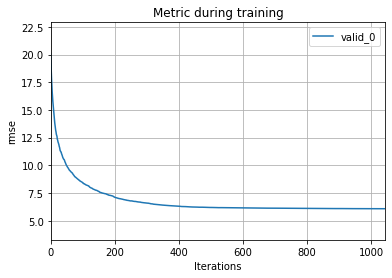

In [50]:
ax = lgb.plot_metric(evals_result, metric='rmse')
plt.show()